
# Linear Regression - Insurance Cost

**Can you accurately predict insurance costs?**

Dataset:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [ ]:
# Points to get across
# Dummy Variables
# Importance of Correlation Screening
# How to read R-Sq and p-value
# Model evaluation & Normal Dist of Residuals & Confidence Levels
# Applying Domain Knowledge to do better feature engineering to get a better model
# How to interpret model coeffecients

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the insurance csv file as a DataFrame called insurance.**

In [45]:
insurance = pd.read_csv('..\data\insurance\insurance.csv')

**Check the head of insurance, and check out its info() and describe() methods.**

In [46]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


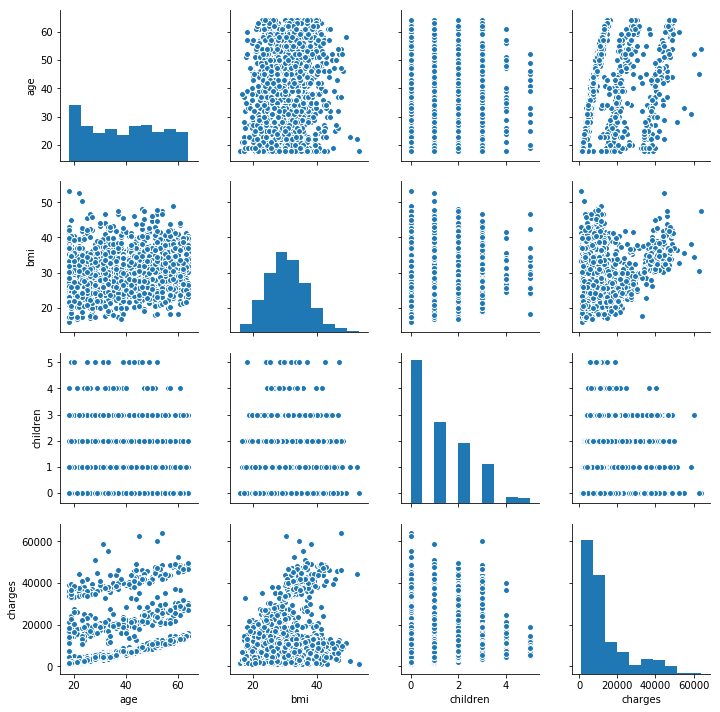

In [48]:
# Do you see any relationships between the columns?
sns.pairplot(insurance)

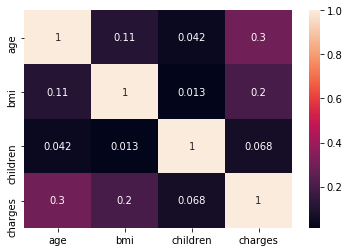

In [49]:
# Check correlations
# Be careful of any X variables that have high corelation with other Xs
sns.heatmap(insurance.corr(), annot=True)

## Data Prep
** 1) Clean Data **
<br>
** 2) Create Dummy Variables for categorical values**

In [6]:
# In this dataset, there is no data cleaning needed

In [50]:
# Create Dummy Variables
dummy_insurance = pd.get_dummies(insurance, columns=['region', 'sex', 'smoker'])
dummy_insurance = dummy_insurance.drop(columns = ['charges'])
dummy_insurance.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,0,0,0,1,1,0,0,1
1,18,33.770,1,0,0,1,0,0,1,1,0
2,28,33.000,3,0,0,1,0,0,1,1,0
3,33,22.705,0,0,1,0,0,0,1,1,0
4,32,28.880,0,0,1,0,0,0,1,1,0


In [51]:
# Droping unused dummy variables
# Information is not lost by droping these variables
dummy_insurance = dummy_insurance.drop(columns=['region_northeast', 'sex_female', 'smoker_no'])
dummy_insurance.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [52]:
y = insurance['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [53]:
X = dummy_insurance.copy()
X.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
# Merge Back Training Data to use in statsmodel
# statsTrain = X_train.merge(pd.DataFrame(y_train))
statsTrain = X_train.join(pd.DataFrame(y_train))
statsTrain.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,charges
405,52,38.380,2,0,0,0,0,0,11396.90020
835,42,35.970,2,0,1,0,1,0,7160.33030
483,51,39.500,1,0,0,1,0,0,9880.06800
319,32,37.335,1,0,0,0,1,0,4667.60765
956,54,30.800,1,0,1,0,1,1,41999.52000


## Import Regression & Utilities Libraries

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from scipy import stats

## Feature Selection & Model Training
** What do you think is the relationship between Y and Xs ? **
<br>
This is where you select / create "features" to use in your model.

** 1st pass **
<br>
Try all Xs

In [58]:
### STATSMODELS ###

# create a fitted model using all Xs
lm = smf.ols(formula='charges ~ age + bmi + children + region_northwest + region_southeast + region_southwest + sex_male + smoker_yes', data=statsTrain).fit()

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     339.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):          3.00e-269
Time:                        15:26:49   Log-Likelihood:                -9495.5
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.256e+04   1204.611    -10.427      0.000   -1.49e+04   -1.02e+04
age                241.2788     14.536     16.599      0.000     212.752     269.806
bmi                367.1888     34.647     10.598      0.000     299.193     435.184
children           494.2906    170.174      2.905      0.004     160.319     828.262
region_northwest   169.8263    574.332      0.296      0.768    -957.316    1296.969
region_southeast  -592.9450    587.946     -1.009      0.313   -1746.804     560.914
region_southwest  -880.6481    588.574     -1.496      0.135   -2035.740     274.444
sex_male            52.1355    406.812      0.128      0.898    -746.244     850.515
smoker_yes        2.346e+04    493.551     47.540      0.000    2.25e+04    2.44e+04
==============================================================================
Omnibus:                      211.700   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.790
Skew:                           1.227   Prob(JB):                    1.08e-104
Kurtosis:                       5.500   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2
<br>
** Look at the "P>|t|" column & drop features where "P>|t|" > 0.05 **

In [59]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='charges ~ age + bmi + children + smoker_yes', data=statsTrain).fit()

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     677.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):          8.23e-274
Time:                        15:26:52   Log-Likelihood:                -9497.6
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     931   BIC:                         1.903e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.251e+04   1152.414    -10.852      0.000   -1.48e+04   -1.02e+04
age          241.8158     14.511     16.664      0.000     213.338     270.294
bmi          355.2088     33.152     10.715      0.000     290.148     420.270
children     495.1341    169.943      2.914      0.004     161.618     828.651
smoker_yes  2.345e+04    491.049     47.762      0.000    2.25e+04    2.44e+04
==============================================================================
Omnibus:                      215.647   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.028
Skew:                           1.243   Prob(JB):                    3.21e-108
Kurtosis:                       5.552   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the Model

Let's evaluate our model performance by making predictions with test data and calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [95]:
# Predict Test Data
predictions = lm1.predict(X_test)

In [96]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4010.304497356853
MSE: 33678156.686448015
RMSE: 5803.288437295531


## Residuals

You should have gotten a good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

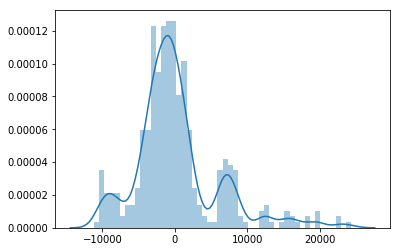

In [97]:
sns.distplot((y_test-predictions),bins=50);

## Model 3
<br>
** Drop Xs where "P>|t|" > 0.05 & **
<br>
** Let's try to give the model an interaction variable between obesity & smoking **

In [63]:
# Create an obese variable
statsTrain['obese'] = (statsTrain['bmi'] > 30)*1
statsTrain.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,charges,obese
405,52,38.380,2,0,0,0,0,0,11396.90020,1
835,42,35.970,2,0,1,0,1,0,7160.33030,1
483,51,39.500,1,0,0,1,0,0,9880.06800,1
319,32,37.335,1,0,0,0,1,0,4667.60765,1
956,54,30.800,1,0,1,0,1,1,41999.52000,1


In [64]:
# Create the interaction variable
statsTrain['obese_smoke'] = statsTrain['obese'] * statsTrain['smoker_yes']
statsTrain.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,charges,obese,obese_smoke
405,52,38.380,2,0,0,0,0,0,11396.90020,1,0
835,42,35.970,2,0,1,0,1,0,7160.33030,1,0
483,51,39.500,1,0,0,1,0,0,9880.06800,1,0
319,32,37.335,1,0,0,0,1,0,4667.60765,1,0
956,54,30.800,1,0,1,0,1,1,41999.52000,1,1


In [89]:
### STATSMODELS ###

# create a fitted model
lm2 = smf.ols(formula='charges ~ age  + children + smoker_yes + obese_smoke', data=statsTrain).fit()

# print a summary of the fitted model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1486.
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:37:27   Log-Likelihood:                -9200.0
No. Observations:                 936   AIC:                         1.841e+04
Df Residuals:                     931   BIC:                         1.843e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2367.1682    458.532     -5.162      0.000   -3267.043   -1467.293
age           261.1953     10.510     24.853      0.000     240.570     281.821
children      516.6276    123.657      4.178      0.000     273.949     759.306
smoker_yes   1.284e+04    484.527     26.510      0.000    1.19e+04    1.38e+04
obese_smoke  2.045e+04    632.749     32.316      0.000    1.92e+04    2.17e+04
==============================================================================
Omnibus:                      638.908   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5565.807
Skew:                           3.218   Prob(JB):                         0.00
Kurtosis:                      13.064   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

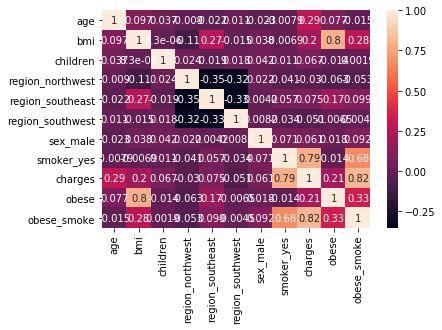

In [82]:
sns.heatmap(statsTrain.corr(), annot=True)

## Evaluating Model 3

Let's evaluate our model performance by making predictions with test data and calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [90]:
# Transform & Prep X_test
# old pandas style
# X_test['obese'] = (X_test['bmi'] > 30)*1
# X_test.loc[:,'obese_smoke'] = X_test['obese'] * X_test['smoker_yes']

# new pandas style
X_test = X_test.assign(obese = (X_test['bmi'] > 30)*1)
X_test = X_test.assign(obese_smoke = X_test['obese'] * X_test['smoker_yes'])
X_test.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,obese,obese_smoke
44,38,37.050,1,0,0,0,1,0,1,0
134,20,28.785,0,0,0,0,0,0,0,0
980,54,25.460,1,0,0,0,1,0,0,0
618,19,33.110,0,0,1,0,0,1,1,1
1238,37,22.705,3,0,0,0,1,0,0,0


In [91]:
# Predict Test Data
predictions = lm2.predict(X_test)

In [92]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2553.1191331375194
MSE: 19871161.534182042
RMSE: 4457.7081032950155


## Model 3 Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

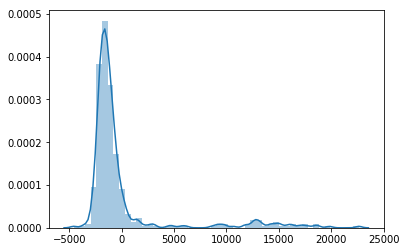

In [93]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
** Of the 3 models above which model should we choose? **
<br>
1) High Adj. R-squared
<br>
2) Low RMSE
<br>

Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [100]:
coeffecients = pd.DataFrame(lm2.params)
# coeffecients = pd.DataFrame(lm.coef_,X.columns)
# coeffecients.columns = ['Coeffecient']
coeffecients

,0
Intercept,-2367.168165
age,261.195315
children,516.627617
smoker_yes,12844.987368
obese_smoke,20447.869138


** How can you interpret these coefficients? **


*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.